## LAB 11.Shopping Mall Customer Segmentation using Clustering

### Step1. Undertstand Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df["Annual Income (k$)"].value_counts()

54     12
78     12
60      6
87      6
62      6
63      6
71      6
48      6
33      4
19      4
39      4
40      4
103     4
73      4
43      4
65      4
77      4
46      4
28      4
20      4
88      4
67      4
44      2
42      2
47      2
17      2
16      2
21      2
38      2
23      2
       ..
29      2
25      2
24      2
18      2
137     2
50      2
79      2
120     2
113     2
101     2
99      2
98      2
97      2
93      2
86      2
85      2
81      2
76      2
57      2
75      2
74      2
72      2
70      2
69      2
64      2
61      2
126     2
59      2
58      2
15      2
Name: Annual Income (k$), Length: 64, dtype: int64

### Step2.Label Encode Gender

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Genre']= label_encoder.fit_transform(df['Genre'])
df['Genre'].unique()

array([1, 0], dtype=int64)

### Step3.Check for variance

In [10]:
df.describe()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null int32
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int32(1), int64(4)
memory usage: 7.1 KB


In [12]:
df.var()

CustomerID                3350.000000
Genre                        0.247638
Age                        195.133166
Annual Income (k$)         689.835578
Spending Score (1-100)     666.854271
dtype: float64

In [13]:
df.corr()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Genre,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


### Step4.Check for skewness

In [14]:
df.skew()

CustomerID                0.000000
Genre                     0.243578
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [15]:
df.sort_values(by =['Genre','Age','Annual Income (k$)','Spending Score (1-100)'])

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
114,115,0,18,65,48
111,112,0,19,63,54
115,116,0,19,65,50
2,3,0,20,16,6
39,40,0,20,37,75
31,32,0,21,30,73
35,36,0,21,33,81
84,85,0,21,54,57
105,106,0,21,62,42
5,6,0,22,17,76


### Step5.Pair Plot

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

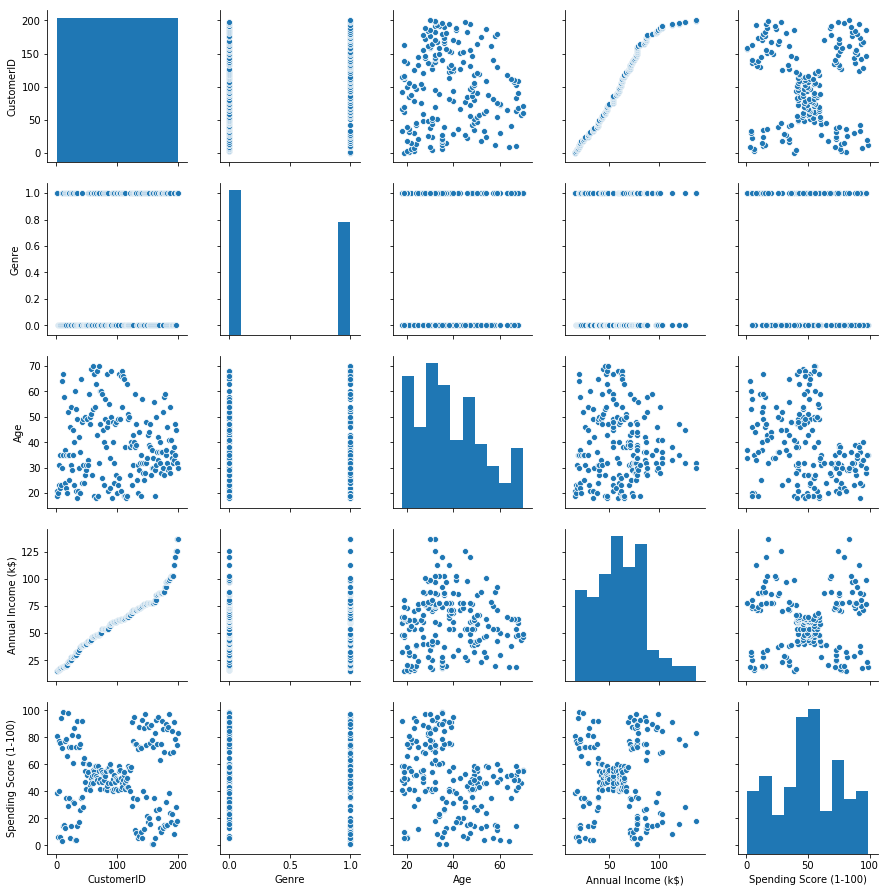

In [17]:
sns.pairplot(data=df)

### Step6.Build KMeans

In [18]:
from sklearn.cluster import KMeans

In [19]:
df.drop(['CustomerID'],axis=1, inplace=True)

In [20]:
KM = KMeans(n_clusters=5)

In [21]:
KM.fit(df)

KMeans(n_clusters=5)

In [22]:
KM.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [23]:
print(KM.cluster_centers_)

[[ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.41772152 43.08860759 55.29113924 49.56962025]
 [ 0.39130435 25.52173913 26.30434783 78.56521739]
 [ 0.52777778 40.66666667 87.75       17.58333333]
 [ 0.39130435 45.2173913  26.30434783 20.91304348]]


### Step7.Scatter Plot

In [24]:
import warnings
warnings.filterwarnings('ignore')

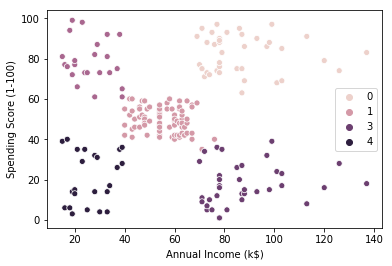

In [25]:
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=KM.labels_)

### Step8.Cluster Analysis

In [26]:
kmeans2 = KMeans(n_clusters = 5, init='k-means++')
kmeans2.fit(df)
pred = kmeans2.predict(df)

In [27]:
frame = pd.DataFrame(df)
frame['cluster'] = pred

In [28]:
frame.cluster.value_counts()

0    79
2    39
3    36
4    23
1    23
Name: cluster, dtype: int64

In [29]:
frame

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,4
1,1,21,15,81,1
2,0,20,16,6,4
3,0,23,16,77,1
4,0,31,17,40,4
5,0,22,17,76,1
6,0,35,18,6,4
7,0,23,18,94,1
8,1,64,19,3,4
9,0,30,19,72,1


In [30]:
C0 = df[df['cluster'] == 0]
C1 = df[df['cluster'] == 1]
C2 = df[df['cluster'] == 2]
C3 = df[df['cluster'] == 3]
C4 = df[df['cluster'] == 4]

In [31]:
import statistics as ss
print('Average Age : ',C0['Age'].mean())
print('Average Annual Income : ',C0['Annual Income (k$)'].mean())
print('Deviation of the mean for annual Income : ',ss.stdev(C0['Annual Income (k$)']))
print('No. of Customers ie shape :' ,C0.shape)
print('From those Customers We have',C0.Genre.value_counts()[1],'male and',C0.Genre.value_counts()[0],'female')

Average Age :  43.08860759493671
Average Annual Income :  55.29113924050633
Deviation of the mean for annual Income :  8.710665285219767
No. of Customers ie shape : (79, 5)
From those Customers We have 33 male and 46 female


In [32]:
print('Average Age : ',C1['Age'].mean())
print('Average Annual Income : ',C1['Annual Income (k$)'].mean())
print('Deviation of the mean for annual Income : ',ss.stdev(C1['Annual Income (k$)']))
print('No. of Customers ie shape :' ,C1.shape)
print('From those Customers We have',C1.Genre.value_counts()[1],'male and',C1.Genre.value_counts()[0],'female')

Average Age :  25.52173913043478
Average Annual Income :  26.304347826086957
Deviation of the mean for annual Income :  7.893811054517766
No. of Customers ie shape : (23, 5)
From those Customers We have 9 male and 14 female


In [33]:
print('Average Age : ',C2['Age'].mean())
print('Average Annual Income : ',C2['Annual Income (k$)'].mean())
print('Deviation of the mean for annual Income : ',ss.stdev(C2['Annual Income (k$)']))
print('No. of Customers ie shape :' ,C2.shape)
print('From those Customers We have',C2.Genre.value_counts()[1],'male and',C2.Genre.value_counts()[0],'female')

Average Age :  32.69230769230769
Average Annual Income :  86.53846153846153
Deviation of the mean for annual Income :  16.312484972924967
No. of Customers ie shape : (39, 5)
From those Customers We have 18 male and 21 female


In [34]:
print('Average Age : ',C3['Age'].mean())
print('Average Annual Income : ',C3['Annual Income (k$)'].mean())
print('Deviation of the mean for annual Income : ',ss.stdev(C3['Annual Income (k$)']))
print('No. of Customers ie shape :' ,C3.shape)
print('From those Customers We have',C3.Genre.value_counts()[1],'male and',C3.Genre.value_counts()[0],'female')

Average Age :  40.666666666666664
Average Annual Income :  87.75
Deviation of the mean for annual Income :  16.387059354433127
No. of Customers ie shape : (36, 5)
From those Customers We have 19 male and 17 female


In [35]:
print('Average Age : ',C4['Age'].mean())
print('Average Annual Income : ',C4['Annual Income (k$)'].mean())
print('Deviation of the mean for annual Income : ',ss.stdev(C4['Annual Income (k$)']))
print('No. of Customers ie shape :' ,C4.shape)
print('From those Customers We have',C4.Genre.value_counts()[1],'male and',C4.Genre.value_counts()[0],'female')

Average Age :  45.21739130434783
Average Annual Income :  26.304347826086957
Deviation of the mean for annual Income :  7.893811054517766
No. of Customers ie shape : (23, 5)
From those Customers We have 9 male and 14 female


### Step9.Find the best number of clusters

In [36]:
SSE = []
for clust in range(1,20):
    KM = KMeans(n_clusters= clust, init='k-means++')
    KM = KM.fit(df)
    SSE.append(KM.inertia_)

Text(0,0.5,'Inertia')

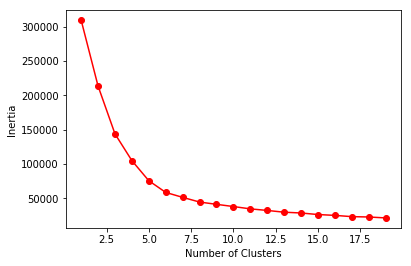

In [37]:
plt.plot(np.arange(1,20), SSE,'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

### Step 10.Reduce Dimension using PCA

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=2)
_PCA = pca.fit_transform(df)
PCA_Components = pd.DataFrame(_PCA)

In [40]:
PCA_Components

,0,1
0,-31.545771,-33.293594
1,1.380815,-56.829069
2,-57.294504,-13.701947
3,-1.587847,-53.497941
4,-31.876887,-30.686269
5,-1.609804,-52.246856
6,-58.988863,-10.141723
7,13.037231,-61.476100
8,-66.303461,-3.896980
9,-5.140589,-47.327131


In [41]:
KM1 = KMeans(n_clusters=5)
KM1.fit(PCA_Components)
KM1.cluster_centers_

array([[  5.49215487, -46.61607243],
       [ -4.35721702,  -3.17573855],
       [-10.69796736,  42.23778754],
       [-44.30543776, -10.48865298],
       [ 41.51847046,   2.33636916]])

In [42]:
KM1.labels_

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

### Step 11.Scatter Plot

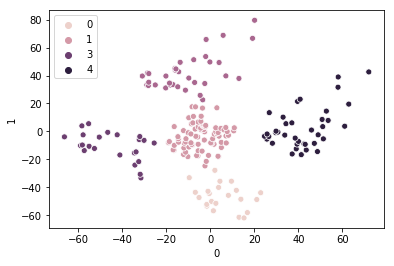

In [43]:
sns.scatterplot(PCA_Components[0], PCA_Components[1], hue=KM1.labels_)

### Step12. Mean Shift Clustering

In [44]:
from sklearn.cluster import MeanShift, AgglomerativeClustering

In [45]:
MS = MeanShift(bandwidth = 50)
MS.fit(PCA_Components)
MS.cluster_centers_

array([[ 0.39783103, -4.10669988]])

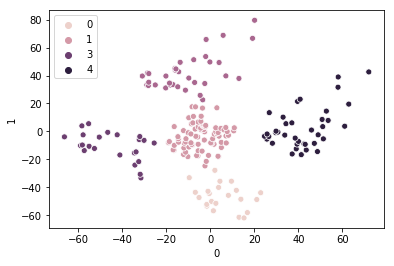

In [46]:
sns.scatterplot(PCA_Components[0], PCA_Components[1], hue=KM1.labels_)

### Step13.Predict Hierarchical Clusters using Agglomerative clustering

In [47]:
AC = AgglomerativeClustering(n_clusters = 5, linkage='ward',compute_full_tree=True)
AC.fit(df)

AgglomerativeClustering(compute_full_tree=True, n_clusters=5)

In [48]:
AC.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int64)

In [49]:
df['Cluster'] = AC.labels_

In [50]:
import scipy.cluster.hierarchy as sch

In [51]:
from scipy.cluster import hierarchy

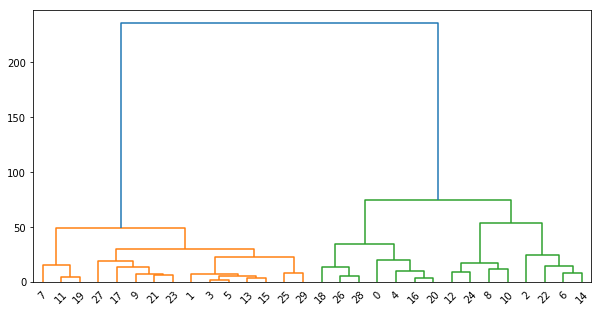

In [52]:
Z = hierarchy.linkage(df[:30], 'ward')
plt.figure(figsize=(10,5))
dn = hierarchy.dendrogram(Z)

### Step14.Visualize Scatter Plot with hue as agglomerative clustering labels_

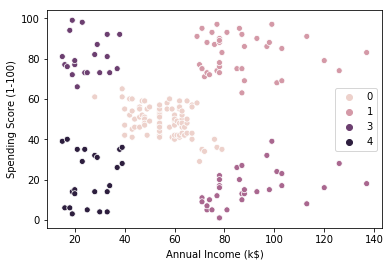

In [53]:
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], hue=AC.labels_)